In [17]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [18]:
local_weights_file = 'C:/Navneet/jupyter/datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape=(150,150,3),
                               include_top=False,
                               weights = None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [19]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('C:/Navneet/jupyter/datasets/cats_and_dogs_filtered/train',
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))  
validation_generator = test_datagen.flow_from_directory('C:/Navneet/jupyter/datasets/cats_and_dogs_filtered/validation',
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))  

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history=  model.fit(train_generator,
                   validation_data = validation_generator,
                   steps_per_epoch = 100,
                   epochs= 20,
                   validation_steps=50,
                   verbose=)

Epoch 1/20
100/100 [==============================] - 102s 1s/step - loss: 0.3431 - accuracy: 0.8590 - val_loss: 0.1369 - val_accuracy: 0.9470
Epoch 2/20
100/100 [==============================] - 101s 1s/step - loss: 0.2294 - accuracy: 0.9155 - val_loss: 0.1322 - val_accuracy: 0.9480
Epoch 3/20
100/100 [==============================] - 101s 1s/step - loss: 0.2118 - accuracy: 0.9270 - val_loss: 0.1078 - val_accuracy: 0.9610
Epoch 4/20
100/100 [==============================] - 101s 1s/step - loss: 0.2056 - accuracy: 0.9205 - val_loss: 0.1022 - val_accuracy: 0.9650
Epoch 5/20
100/100 [==============================] - 101s 1s/step - loss: 0.1846 - accuracy: 0.9350 - val_loss: 0.0963 - val_accuracy: 0.9700
Epoch 6/20
100/100 [==============================] - 101s 1s/step - loss: 0.1666 - accuracy: 0.9435 - val_loss: 0.1355 - val_accuracy: 0.9620
Epoch 7/20
100/100 [==============================] - 101s 1s/step - loss: 0.1649 - accuracy: 0.9375 - val_loss: 0.1706 - val_accuracy: 0.9510

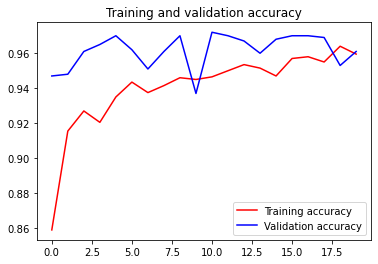

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()